# Lending Club Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

style.use('ggplot')

Reading loan data set

In [2]:
loan=pd.read_csv('loan.csv', encoding='utf-8', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Cleaning

Identifying the percentage of missing values in rows

In [4]:
missing_cols = round(100*((loan.isnull().sum())/(len(loan.index))),2)
missing_cols

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

Below are the list of columns having more than 50% values missing.
It's better to drop these rows as it won't contribute much in our analysis.

In [5]:
cols_to_drop = list(missing_cols[missing_cols > 50].index)
cols_to_drop

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


In [6]:
loan.shape

(39717, 111)

There are 111 columns in total and after dropping rows, we are left with 54 columns.

In [7]:
loan.drop(cols_to_drop, axis=1, inplace = True)
loan.shape

(39717, 54)

Let's move and check further for missing values. We can see below there are still 11 rows with missing values, let's clean them up step by step.

In [8]:
missing_cols=round(100*((loan.isnull().sum())/(len(loan.index))),2)
missing_cols[missing_cols > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

We can see desc column has considerably more null values.
Desc column has Loan description provided by the borrower. It seems this column wont contribute in our analysis and this information can be deduced by other columns such as Purpose.

In [9]:
loan.drop(columns=['desc'], inplace = True)
loan.shape

(39717, 53)

Let's move ahead and check the nature of all remaining columns having missing values.

In [10]:
missing_cols=round(100*((loan.isnull().sum())/(len(loan.index))),2)
loan[list(missing_cols[missing_cols > 0].index)].head(20)

,emp_title,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Computer,83.70%,Jan-15,May-16,0.0,0.0,0.0,0.0
1,Ryder,< 1 year,bike,9.40%,Apr-13,Sep-13,0.0,0.0,0.0,0.0
2,NaN,10+ years,real estate business,98.50%,Jun-14,May-16,0.0,0.0,0.0,0.0
3,AIR RESOURCES BOARD,10+ years,personel,21%,Jan-15,Apr-16,0.0,0.0,0.0,0.0
4,University Medical Group,1 year,Personal,53.90%,May-16,May-16,0.0,0.0,0.0,0.0
5,Veolia Transportaton,3 years,My wedding loan I promise to pay back,28.30%,Jan-15,Jan-16,0.0,0.0,0.0,0.0
6,Southern Star Photography,8 years,Loan,85.60%,May-16,May-16,0.0,0.0,0.0,0.0
7,MKC Accounting,9 years,Car Downpayment,87.50%,Jan-15,Dec-14,0.0,0.0,0.0,0.0
8,NaN,4 years,Expand Business & Buy Debt Portfolio,32.60%,Apr-12,Aug-12,0.0,0.0,0.0,0.0
9,Starbucks,< 1 year,Building my credit history.,36.50%,Nov-12,Mar-13,0.0,0.0,0.0,0.0


In above result we can see that collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies and tax_liens mostly contains values as '0.'. Let's see the unique values they have to understand their spread and contribution in our analysis. 

In [11]:
print('collections_12_mths_ex_med info')
print(loan['collections_12_mths_ex_med'].unique())
print(len(loan['collections_12_mths_ex_med'].unique()))
print()

print('chargeoff_within_12_mths info')
print(loan['chargeoff_within_12_mths'].unique())
print(len(loan['chargeoff_within_12_mths'].unique()))
print()

print('pub_rec_bankruptcies info')
print(loan['pub_rec_bankruptcies'].unique())
print(len(loan['pub_rec_bankruptcies'].unique()))
print()

print('tax_liens info')
print(loan['tax_liens'].unique())
print(len(loan['tax_liens'].unique()))

collections_12_mths_ex_med info
[ 0. nan]
2

chargeoff_within_12_mths info
[ 0. nan]
2

pub_rec_bankruptcies info
[ 0.  1.  2. nan]
4

tax_liens info
[ 0. nan]
2


We can see collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens does not contain much information to contribute and it will be better to narrow down the data set by dropping them.pub_rec_bankruptcies can be relevant to our analysis so not dropping it.

In [12]:
loan.drop(columns=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], inplace = True)
loan.shape

(39717, 50)

Now we are left with 6 columns with missing values, notice there are only small percentage of missing values present in these columns. Let's move ahead and see how can we deal with missing values in these columns.

In [13]:
missing_cols=round(100*((loan.isnull().sum())/(len(loan.index))),2)
missing_cols[missing_cols > 0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

Below we can see that only pub_rec_bankruptcies is of type float and rest are objects and contain information in string format.

In [14]:
loan[list(missing_cols[missing_cols > 0].index)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 7 columns):
emp_title               37258 non-null object
emp_length              38642 non-null object
title                   39706 non-null object
revol_util              39667 non-null object
last_pymnt_d            39646 non-null object
last_credit_pull_d      39715 non-null object
pub_rec_bankruptcies    39020 non-null float64
dtypes: float64(1), object(6)
memory usage: 2.1+ MB


In [15]:
loan[list(missing_cols[missing_cols > 0].index)].head()

,emp_title,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,NaN,10+ years,Computer,83.70%,Jan-15,May-16,0.0
1,Ryder,< 1 year,bike,9.40%,Apr-13,Sep-13,0.0
2,NaN,10+ years,real estate business,98.50%,Jun-14,May-16,0.0
3,AIR RESOURCES BOARD,10+ years,personel,21%,Jan-15,Apr-16,0.0
4,University Medical Group,1 year,Personal,53.90%,May-16,May-16,0.0


We can either impute values or either remove missing values, it does not make sense to impute values in other columns as they are non numeric so we will go for removing null rows and also for pub_rec_bankruptcies as imputing values may lead to bias and we will try to avoid it. Also percentage of missing value is less so won't affect our dataset much.

In [16]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]
loan=loan[~loan.last_credit_pull_d.isnull()]
loan.shape

(36433, 50)

Now, below we can see our data set is cleaned and it does not have missing values

In [17]:
missing_cols=round(100*((loan.isnull().sum())/(len(loan.index))),2)
missing_cols[missing_cols > 0]

Series([], dtype: float64)

We are left with 50 columns and we can understand the purpose of each column and try to find out whether they will be usefull in our analysis or not. Also we should check the nature of values they contain so to get a idea of their usefullness.

In [18]:
loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

-We can see that there are some columns which has only single values, clearly these columns wont contribute in our analysis and can be dropped for cleare dataset. 
* acc_now_delinq                 
* application_type
* policy_code
* initial_list_status
* delinq_amnt
* pymnt_plan

-Also, by looking at the data we can see that some columns contain irrelevant information as per our analysis.  
These columns are  
* id (it's assigned for loan listing and we have one more column member_id which we can use for id column)
* url (we dont need urls for our analysis)

In [19]:
cols_to_drop=['acc_now_delinq', 'application_type', 'policy_code', 'initial_list_status', 'delinq_amnt', 
              'pymnt_plan', 'id', 'url']
loan.drop(columns=cols_to_drop, inplace = True)

In [20]:
loan.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


Also one interesting observation here is that loan amount funded_amnt and funded_amt_invested have similar values. Information is redundant here. loan_amount is relevant to our analysis and funded_amnt_inv and funded_amnt can be dropped.

In [21]:
loan.drop(columns = ['funded_amnt', 'funded_amnt_inv'], inplace = True)

-Now lets move to convert the columns in to their specific for analysis.  
* last_pymnt_d, last_credit_pull_d, issue_d, earliest_cr_line are of object type which needs to be converted in to date type.

In [22]:
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')

-There are some columns which can be converted to numeric columns for analysis.
* int-rate, term and revol-util are some probable columns as per our observation

In [23]:
print(loan[['int_rate', 'term', 'revol_util']].info())
loan[['int_rate', 'term', 'revol_util']].head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 3 columns):
int_rate      36433 non-null object
term          36433 non-null object
revol_util    36433 non-null object
dtypes: object(3)
memory usage: 1.1+ MB
None


,int_rate,term,revol_util
1,15.27%,60 months,9.40%
3,13.49%,36 months,21%
4,12.69%,60 months,53.90%
5,7.90%,36 months,28.30%
6,15.96%,60 months,85.60%
7,18.64%,36 months,87.50%
9,12.69%,60 months,36.50%
10,14.65%,60 months,20.60%
11,12.69%,36 months,67.10%
12,13.49%,36 months,91.70%


'int_rate', 'term' ,'emp_length'and 'revol_util' are object type which can be converted in to numeric type, let's convert them.

In [24]:
#making sure there are only 36 and 60 months as values in term column
loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [25]:
#checking the nature of emp_length, this column can also be converted in to numeric by truncating year and 
#considering < 1 year as 0 and 10+ year as 10
loan.emp_length.value_counts()

# using map function on dataframe column is a good way to map emp_length values,let's create a dictionary for this purpose
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [26]:
loan.int_rate=loan['int_rate'].str.replace('%','').astype('float')
loan.term = loan['term'].str.replace(' months','').astype('float')
loan.revol_util = loan['revol_util'].str.replace('%', '').astype('float')


In [27]:
loan.emp_length = loan['emp_length'].map(emp_length_dict).astype('int')

In [28]:
print(loan[['int_rate', 'term', 'revol_util','emp_length']].info())
loan[['int_rate', 'term', 'revol_util', 'emp_length']].head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
int_rate      36433 non-null float64
term          36433 non-null float64
revol_util    36433 non-null float64
emp_length    36433 non-null int32
dtypes: float64(3), int32(1)
memory usage: 1.3 MB
None


,int_rate,term,revol_util,emp_length
1,15.27,60.0,9.4,0
3,13.49,36.0,21.0,10
4,12.69,60.0,53.9,1
5,7.90,36.0,28.3,3
6,15.96,60.0,85.6,8
7,18.64,36.0,87.5,9
9,12.69,60.0,36.5,0
10,14.65,60.0,20.6,5
11,12.69,36.0,67.1,10
12,13.49,36.0,91.7,0


Check the precision of float columns, can be round off to 2 digits.

In [29]:
#fetching all float columns for checking precision, total_pymnt is the oly column with precision more than 2
loan.loc[:,loan.dtypes=='float'].tail()
loan.total_pymnt=round(loan['total_pymnt'], 2)

During going through the dataset i feel two more columns can also be dropped which won't contribute in our analysis.
* member_id
* zip_code

In [30]:
#let's drop these columns
loan.drop(columns=['member_id', 'zip_code'], inplace=True)

We are done with Data cleaning and let's see at our clean data set

In [31]:
loan.shape

(36433, 38)

In [32]:
loan.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,3.643300e+04,36433.000000,36433.000000,36433.00000,36433.000000,...,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000
mean,11307.679851,42.624324,12.073862,326.186394,5.015645,6.930522e+04,13.444131,0.146131,0.86493,9.351604,...,52.213313,12310.968665,11841.070656,9912.408471,2304.404937,1.299840,92.855490,11.677065,2742.955476,0.041418
std,7433.859357,10.728712,3.734758,207.389943,3.542914,6.354244e+04,6.643308,0.492199,1.06343,4.373772,...,378.443825,9048.420882,8911.319070,7053.212865,2629.542911,7.065629,682.047187,140.880327,4473.528922,0.200221
min,500.000000,36.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.00000,2.000000,...,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5600.000000,36.000000,9.320000,168.900000,2.000000,4.200000e+04,8.360000,0.000000,0.00000,6.000000,...,0.000000,5672.560000,5413.410000,4800.000000,678.010000,0.000000,0.000000,0.000000,226.280000,0.000000
50%,10000.000000,36.000000,11.860000,283.280000,4.000000,6.000000e+04,13.540000,0.000000,1.00000,9.000000,...,0.000000,10101.590000,9632.040000,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,0.000000
75%,15000.000000,60.000000,14.650000,432.220000,9.000000,8.300000e+04,18.690000,0.000000,1.00000,12.000000,...,0.000000,16700.720000,16094.490000,14000.000000,2891.860000,0.000000,0.000000,0.000000,3457.580000,0.000000
max,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.00000,44.000000,...,6307.370000,58563.680000,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [33]:
pd.set_option('display.max_columns', 50)
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60.0,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
3,10000,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,3000,60.0,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
5,5000,36.0,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,7000,60.0,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


In [34]:
loan.purpose.value_counts()

debt_consolidation    17470
credit_card            4726
other                  3575
home_improvement       2705
major_purchase         2008
car                    1443
small_business         1414
wedding                 886
medical                 634
moving                  529
house                   343
vacation                336
educational             276
renewable_energy         88
Name: purpose, dtype: int64

### Bivariate Analysis
-First lets start with plotting of continous variable corelation matrix, it will give us the idea of relation between pairs.

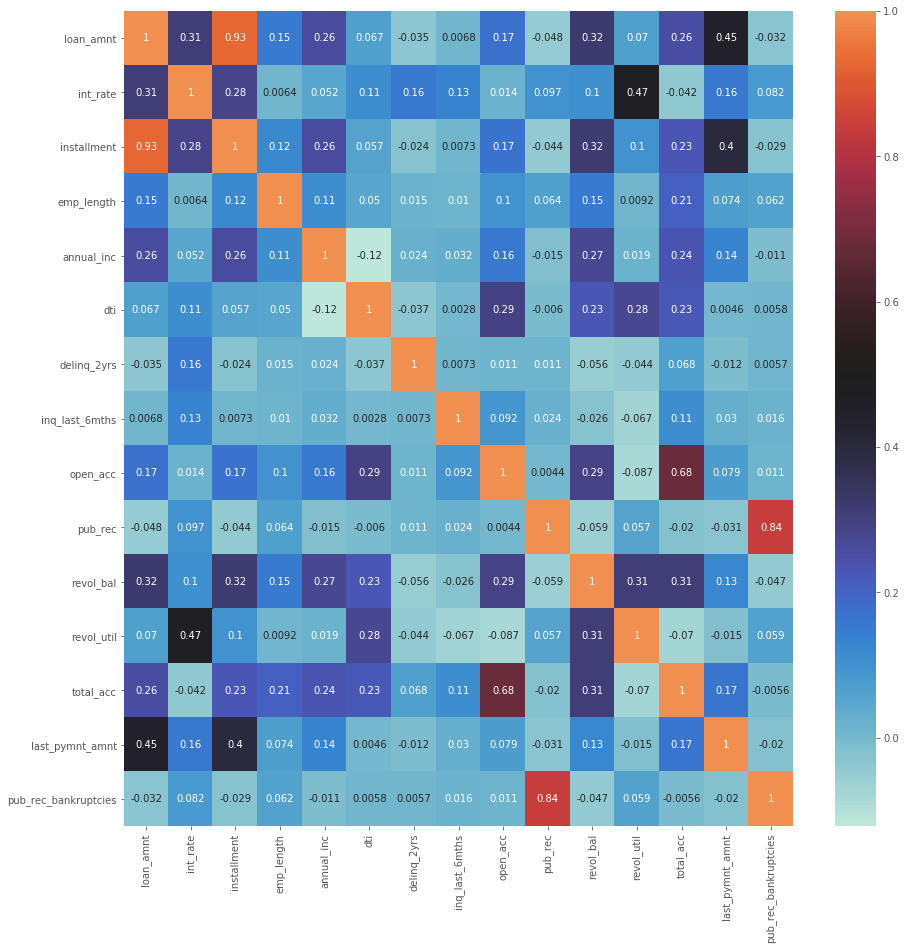

In [35]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

-Observations from above matrix
* loan_amnt and int_rate is positively corelated with a factor of 0.31 which means interest rates are higher for higher loan amount, we will verify it more with other plots.
* revol_util and int_rate are also corelated with a factor of 0.47, will see it in more details using other plots.
* revol_bal is the total amount on your credit that is unpaid, we can see from above matrix it is corelated with loan_amnt with a factor of 0.32 which is significant to tell that loan_amt is more for borrowers having more revol_bal. This can be considered as a risk.

Above matrix is just for getting a quick idea of relations between variables. Let's move ahead and compare pairs of variables with other categorical variables also.

#### Interest Rates and Loan Amount

Let's start with the understanding of loan amount and interest rates

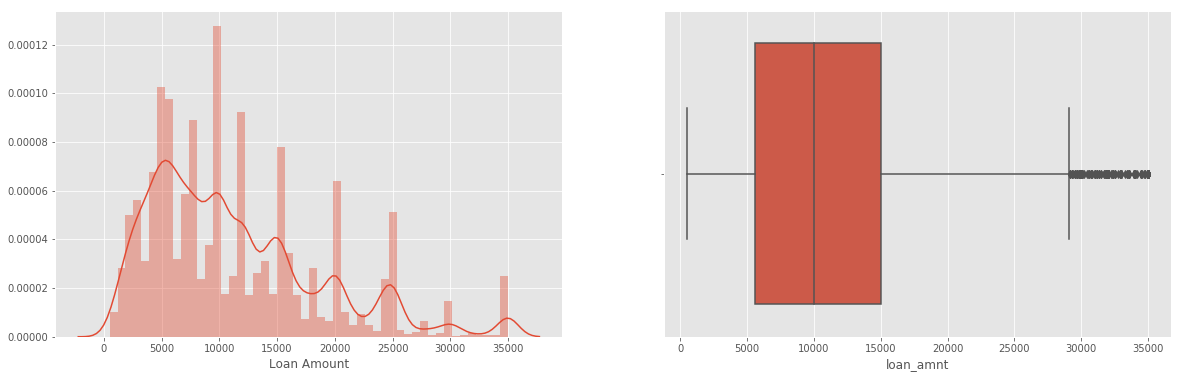

In [36]:
#loan amnt distribution plot
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.distplot(loan['loan_amnt'], axlabel = 'Loan Amount', ax=ax0)
sns.boxplot(loan['loan_amnt'], ax=ax1)
plt.show()

Loan amount is mostly in the range of 5000-15000

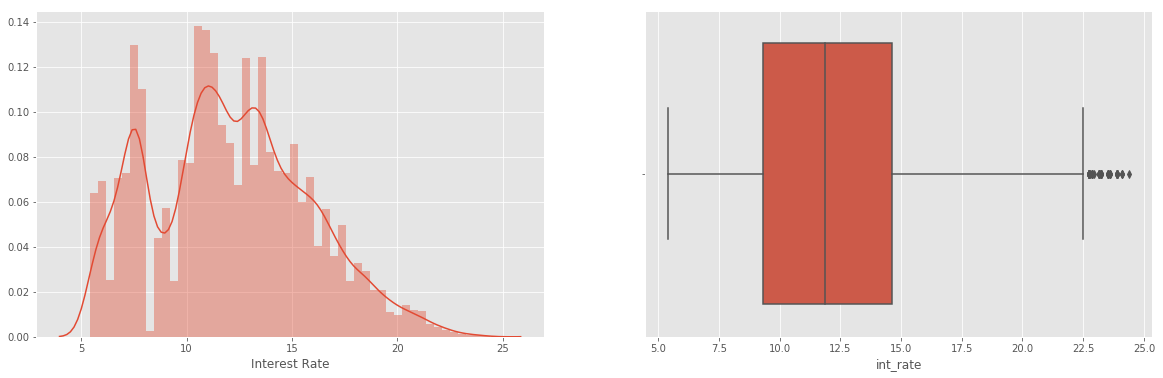

In [37]:
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.distplot(loan['int_rate'], axlabel = 'Interest Rate', ax=ax0)
sns.boxplot(loan['int_rate'], ax=ax1)
plt.show()

Interest rate are mostly in the range of 8-15%, note some of loans are offered at interest rates higher than 20%

Now let's see how the loan amnt and interest rates changes over the time period

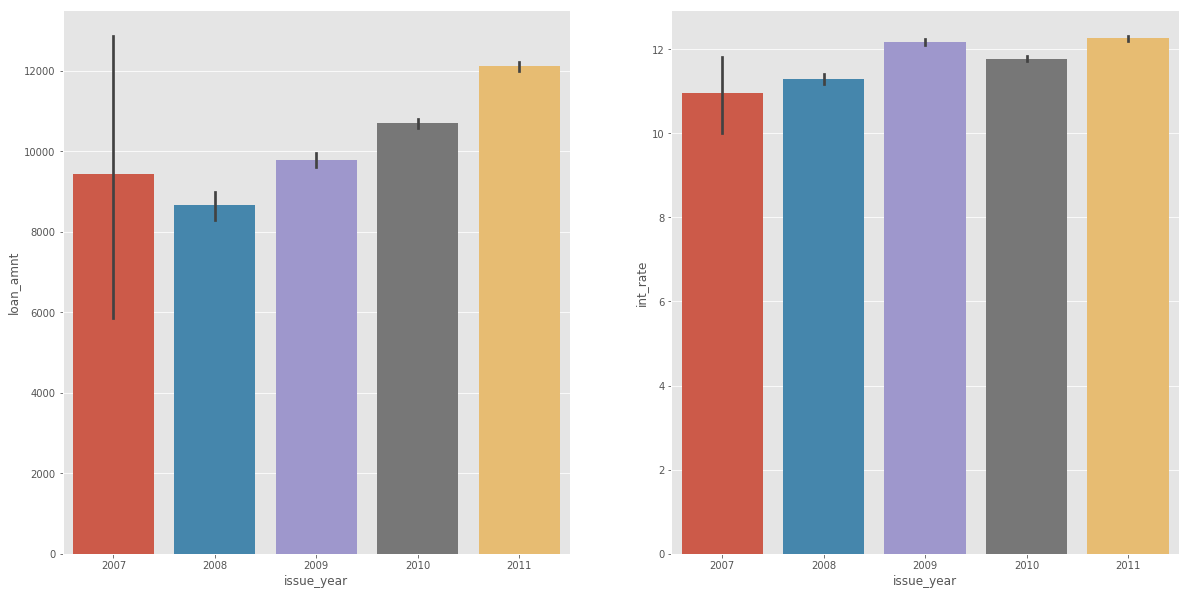

In [38]:
tmp=loan[['loan_amnt', 'int_rate', 'issue_d']]
tmp['issue_year']=loan['issue_d'].dt.year
fig,(ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.barplot(x='issue_year', y='loan_amnt', data=tmp, ax=ax0)
sns.barplot(x='issue_year', y='int_rate', data=tmp, ax=ax1)
plt.show()

We can see Loan amount has been increasing over the years, in 2008 there's a change in trend and that may be due to the economic crisis, also interest rate has been increasing gradually over the years.

#### Grades

Let's see how grades are related and try to find out it's impact on our analysis.

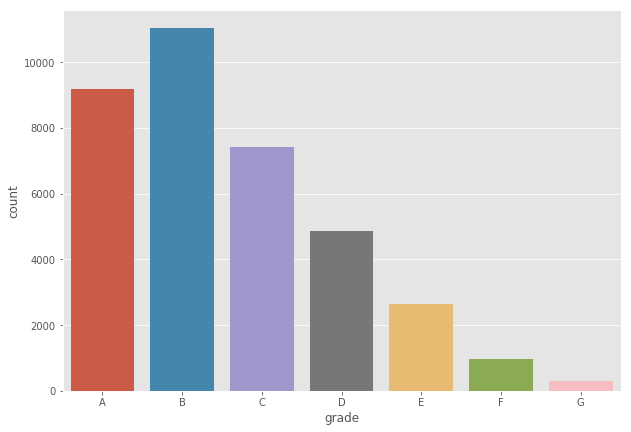

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x='grade', data=loan, order=['A','B','C','D','E','F','G'])
plt.show()

As visually clear from above plot, most of the loans are of high grade. Let's see their impact on charge-offs

In [81]:
grp = loan.groupby(['loan_status','grade'])['grade'].count()
grp

loan_status  grade
Charged Off  A         513
             B        1253
             C        1170
             D         980
             E         648
             F         286
             G          93
Current      A          35
             B         317
             C         250
             D         212
             E         169
             F          67
             G          16
Fully Paid   A        8627
             B        9465
             C        6011
             D        3683
             E        1833
             F         616
             G         189
Name: grade, dtype: int64

In [82]:
cnt = loan.groupby('grade')['grade'].count()
cnt

grade
A     9175
B    11035
C     7431
D     4875
E     2650
F      969
G      298
Name: grade, dtype: int64

In [83]:
percentages = grp.unstack() * 100 / cnt.T
percentages

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,5.591281,11.354780,15.744853,20.102564,24.452830,29.514964,31.208054
Current,0.381471,2.872678,3.364285,4.348718,6.377358,6.914345,5.369128
Fully Paid,94.027248,85.772542,80.890863,75.548718,69.169811,63.570691,63.422819


Text(0, 0.5, 'Charged Off loans in %')

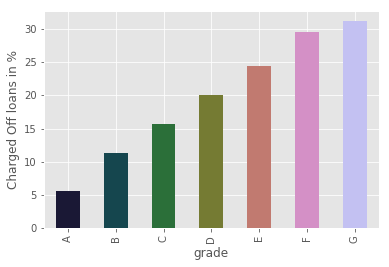

In [41]:
grp = loan.groupby(['loan_status','grade'])['grade'].count()
cnt = loan.groupby('grade')['grade'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

Clearly evident from above graph low grades have more chances of charged-offs and we should avoid giving loans to customers in lower grade.

Let's see how we are charging Interest Rates as per the grades

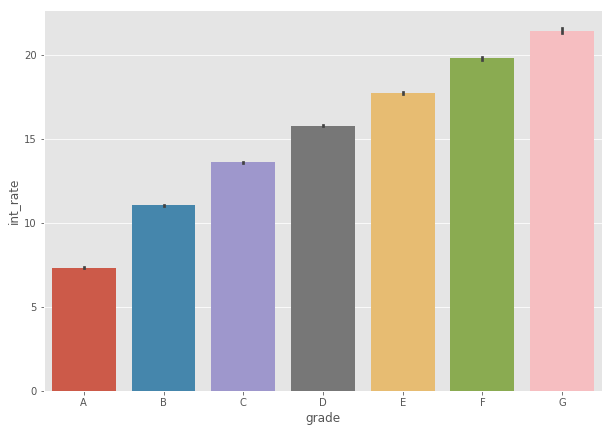

In [42]:
plt.figure(figsize=(10,7))
sns.barplot(x='grade', y='int_rate',data=loan,order=['A','B','C','D','E','F','G'])
plt.show()

Above plot suggests that we are charging more interest rates in lower grade that is good as they are more riskier.

#### Loan Amount

In [43]:
#Frist we need to bin income variable for better visualization.
loan['loan_amnt'].describe()

count    36433.000000
mean     11307.679851
std       7433.859357
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [44]:
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], [x for x in range(0, 36000, 5000)], 
                                      labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

In [45]:
loan[['loan_amnt','loan_amnt_bin']].head()

,loan_amnt,loan_amnt_bin
1,2500,0-5k
3,10000,5-10k
4,3000,0-5k
5,5000,0-5k
6,7000,5-10k


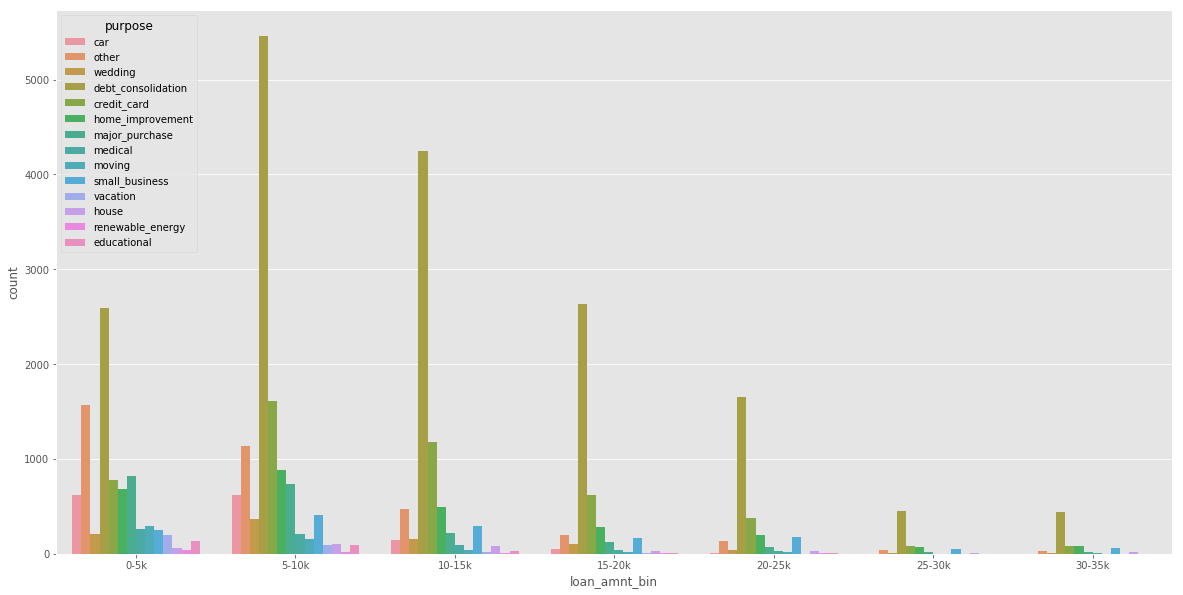

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(x='loan_amnt_bin', hue='purpose',data=loan)
plt.show()

We can see in detail here, debt consolidation and credit card are always the top purpose in each loan amount segment.

Text(0, 0.5, 'Count of loans')

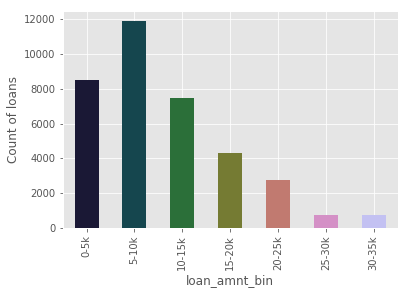

In [47]:
#Let's plot loan amount against percentage of charge-offs to see it's impact on defaults
grp=loan.groupby(by=['loan_status', 'loan_amnt_bin'])['loan_amnt_bin'].count()
cnt=loan.groupby(by='loan_amnt_bin')['loan_amnt_bin'].count()
ax=cnt.plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Count of loans')

We can see most of the loan_amnt has been taken in the range of 5-10k

Text(0, 0.5, 'Charged Off loans in %')

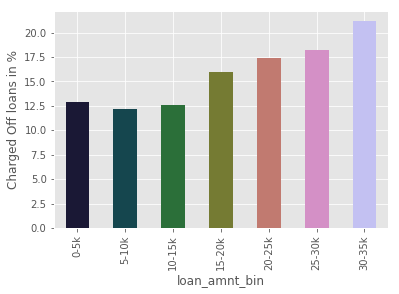

In [48]:
perc=grp.unstack() * 100/ cnt.T
ax=perc.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

This clearly depicts that instead most of the loan amount are in the lower range but charge-offs increases as the loan amount increases. Approving high amount of loans is always risky as it will have more than 20% chances of defaults.

#### Customer Income/ Annual Income

In [49]:
#bin customer income and compare it with loan amount and loan status.
loan.annual_inc.describe()

count    3.643300e+04
mean     6.930522e+04
std      6.354244e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

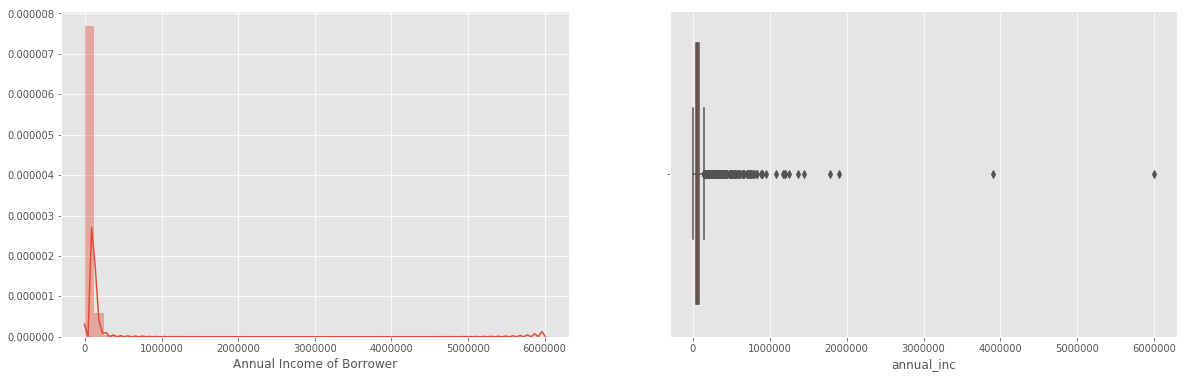

In [50]:
#annual income distribution plot
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.distplot(loan['annual_inc'], axlabel = 'Annual Income of Borrower', ax=ax0)
sns.boxplot(loan['annual_inc'], ax=ax1)
plt.show()

We can see there are some outliers which are affecting the visualization of this graph, outliers must be avoided to see the existing patterns.

In [51]:
#excluding outliers in annual income
temp=loan[loan['annual_inc'] < 150000]
temp.annual_inc.max()

149981.0

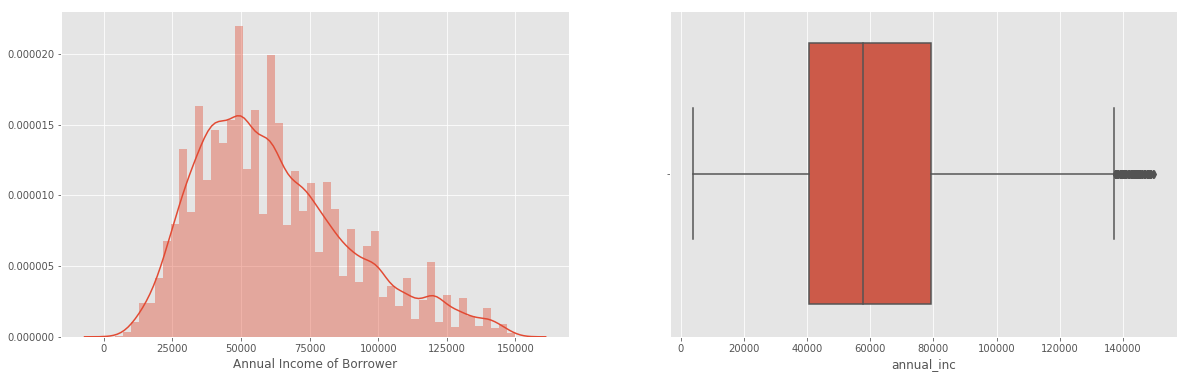

In [52]:
#annual income distribution plot
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.distplot(temp['annual_inc'], axlabel = 'Annual Income of Borrower', ax=ax0)
sns.boxplot(temp['annual_inc'], ax=ax1)
plt.show()

In above plot we can see the maximun spread is in between 0-150000 and bin size of 25000 seems good for analysis

In [53]:
loan['annual_inc_bin'] = pd.cut(loan['annual_inc'], [x for x in range(0, 160000, 25000)], 
                                      labels=[str(x)+'-'+str(x+25)+'k' for x in range (0, 150, 25)])

In [54]:
loan[['annual_inc', 'annual_inc_bin']].head(5)

,annual_inc,annual_inc_bin
1,30000.0,25-50k
3,49200.0,25-50k
4,80000.0,75-100k
5,36000.0,25-50k
6,47004.0,25-50k


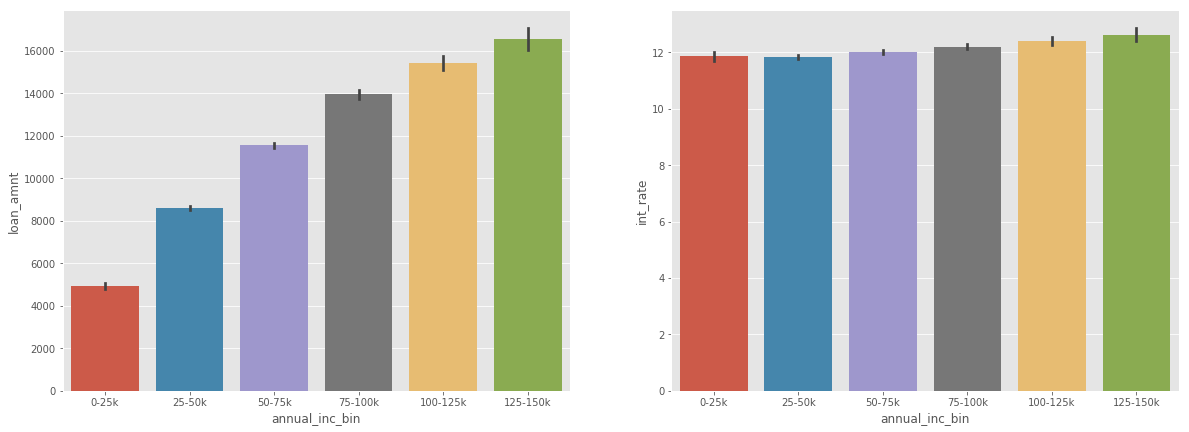

In [55]:
#plotting annual income against loan amount and int_rate
fig,(ax0,ax1)=plt.subplots(nrows=1,ncols=2,figsize=(20,7))
sns.barplot(x='annual_inc_bin', y='loan_amnt',data=loan,ax=ax0)
sns.barplot(x='annual_inc_bin', y='int_rate',data=loan,ax=ax1)
plt.show()

This seems obvious, loan amount increases as income increases and a small variance in int rate that is obvious also.

Text(0, 0.5, 'Charged Off loans in %')

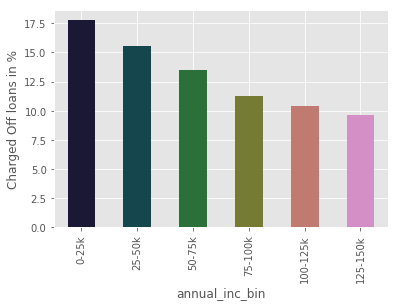

In [56]:
grp = loan.groupby(['loan_status','annual_inc_bin'])['annual_inc_bin'].count()
cnt = loan.groupby('annual_inc_bin')['annual_inc_bin'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

Charge-Offs percentage are more for customer in lower income segment, Lending clubs can be more concious when providing loan in lower annual income segment.

#### DTI - Debt To Income ratio

Let's see how DTI ratio is related with Loan status

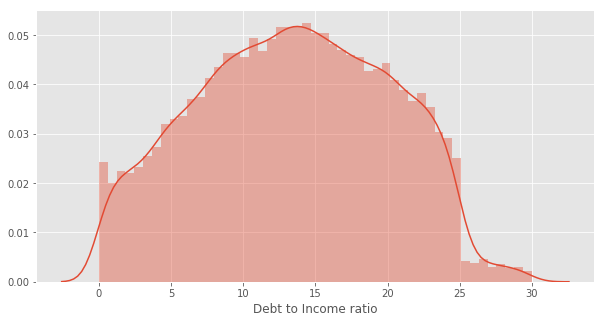

In [57]:
#first we will see the DTI variance and data spread to identify the bin size.
plt.figure(figsize=(10,5))
sns.distplot(loan['dti'], axlabel='Debt to Income ratio')
plt.show()

In [58]:
loan.dti.describe()

count    36433.000000
mean        13.444131
std          6.643308
min          0.000000
25%          8.360000
50%         13.540000
75%         18.690000
max         29.990000
Name: dti, dtype: float64

In [59]:
#Lets derive new column dti_bin
loan['dti_bin'] = pd.cut(loan['dti'], [x for x in range(0, 31, 5)], 
                                      labels=[str(x)+'-'+str(x+5)+'%' for x in range (0, 30, 5)])

In [60]:
loan[['dti', 'dti_bin']].head()

,dti,dti_bin
1,1.00,0-5%
3,20.00,15-20%
4,17.94,15-20%
5,11.20,10-15%
6,23.51,20-25%


In [61]:
#Let's plot dti against the percentage of charged off loans.
grp=loan.groupby(by=['loan_status', 'dti_bin'])['dti_bin'].count()
cnt=loan.groupby(by='dti_bin')['dti_bin'].count()
cnt

dti_bin
0-5%      4376
5-10%     7314
10-15%    9152
15-20%    8428
20-25%    6394
25-30%     624
Name: dti_bin, dtype: int64

Note: There are very less customer in DTI range 25-30%

In [62]:
perc=grp.unstack()*100/cnt.T
perc

dti_bin,0-5%,5-10%,10-15%,15-20%,20-25%,25-30%
loan_status,,,,,,
Charged Off,11.334552,11.594203,13.767483,14.653536,15.686581,12.500000
Current,1.919561,2.584085,2.742570,3.061224,3.597122,7.852564
Fully Paid,86.745887,85.821712,83.489948,82.285240,80.716297,79.647436


Text(0, 0.5, '% of loans Charged Off')

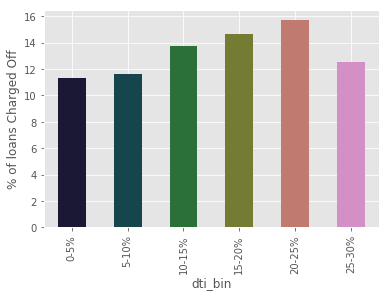

In [63]:
ax=perc.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('% of loans Charged Off')

Charge-Offs percentage is increasing as DTI increases that means it is risky to provide loans to customer whose DTI percentage is high. Charge-Offs percentage is more than 14% in DTI range 15-25% but decreases after that which is due to the very less number of customer in that range.

#### Home Ownership Vs Loan Status

In [64]:
#before comparison, lets filter out our loan dataset to include only fully_paid and charged-off loan status, 
#current wont add much in our analysis.
filter_cond=loan['loan_status'].str.contains('Charged Off') | loan['loan_status'].str.contains('Fully Paid')
loan_filtered = loan[filter_cond]
loan_filtered.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

Text(0, 0.5, 'Charged Off loans in %')

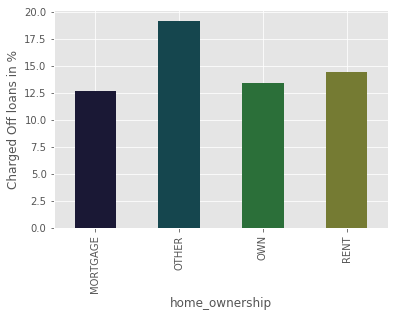

In [65]:
grp = loan.groupby(['loan_status','home_ownership'])['home_ownership'].count()
cnt = loan.groupby('home_ownership')['home_ownership'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

Here we can see that home ownership does not have any significant impact on Loan Status and we can not say that borrower's home ownership with rent or mortgage will tend to default more or vice versa.

#### Purpose Vs Loan Status

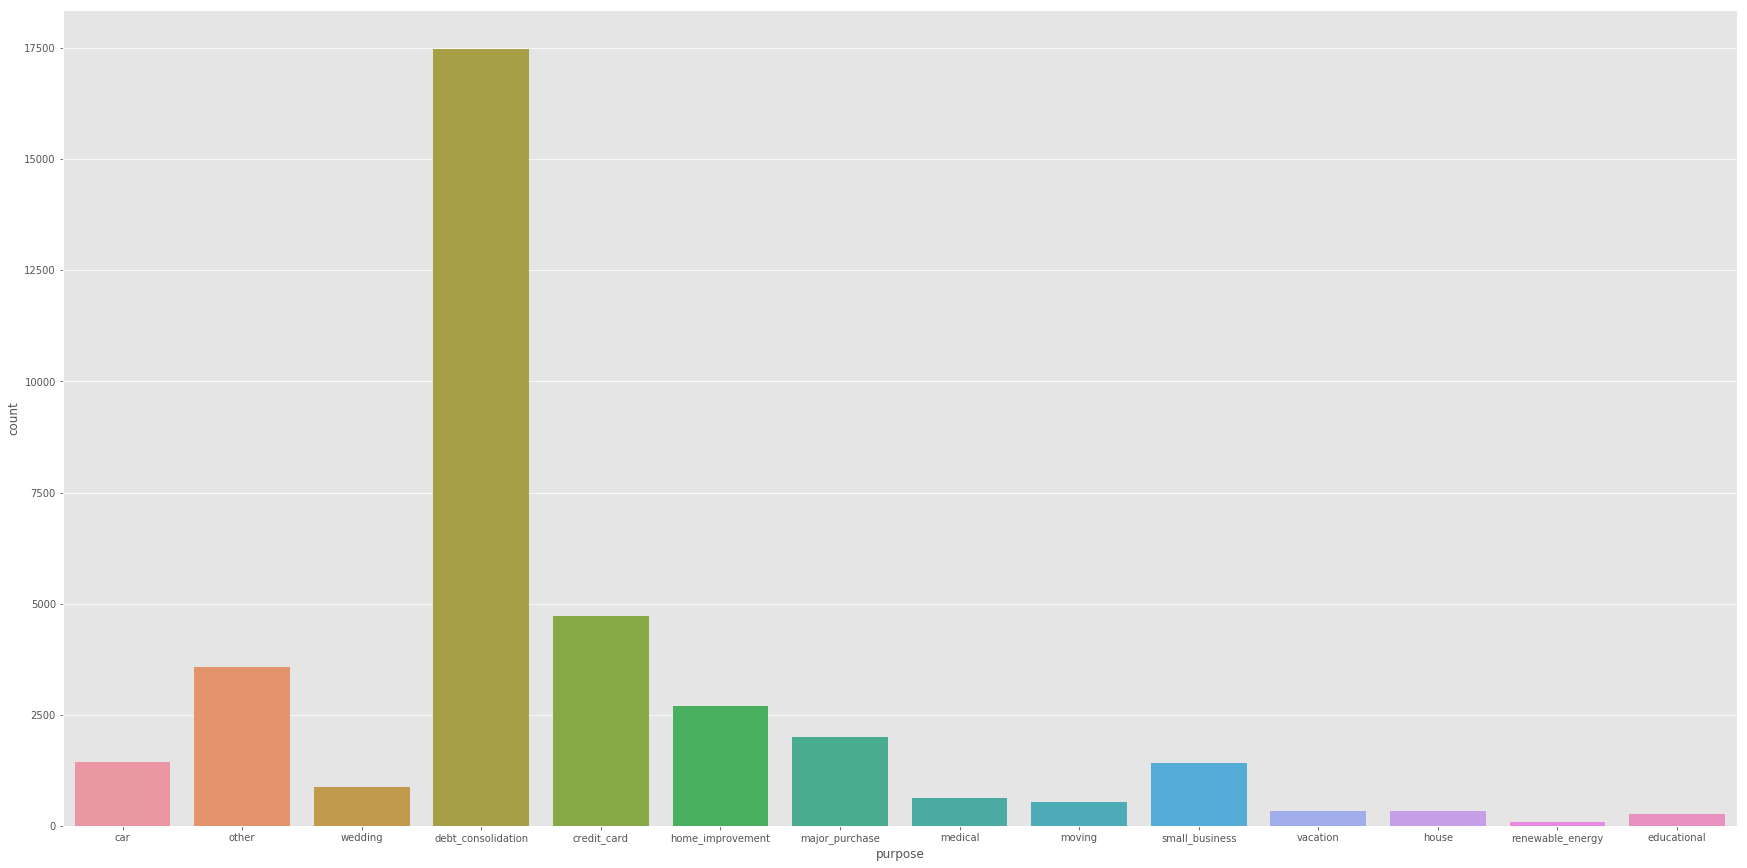

In [66]:
plt.figure(figsize = (30,15))
sns.countplot(x='purpose', data = loan)
plt.show()

More number of loans is taken for debt_consolidation followed by credit_card.

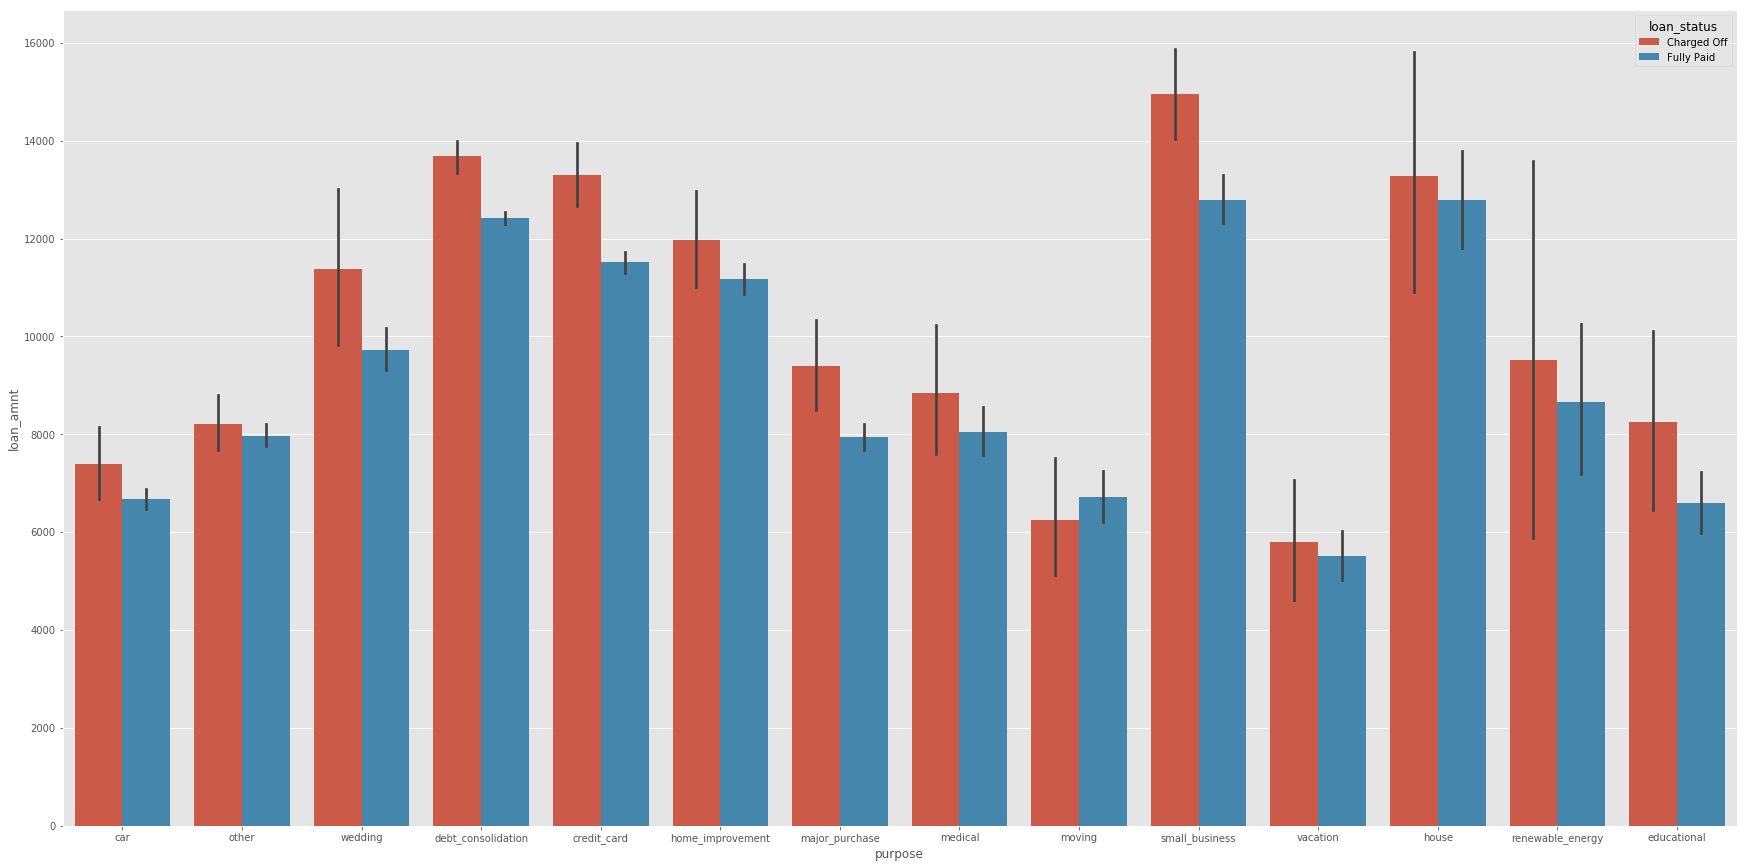

In [67]:
plt.figure(figsize=(30,15))
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status',data=loan_filtered, estimator=np.mean)
plt.show()

This is one interesting observation, here we can see loan is taken more for small business purpose and also risk is more in when it is taken for the purpose of small business.

#### Emp Length Vs Loan Status

Text(0, 0.5, 'Charged Off loans in %')

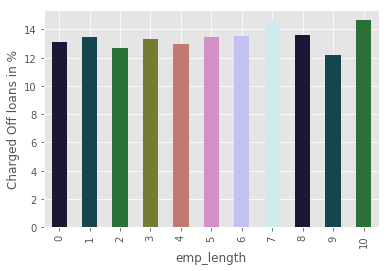

In [68]:
grp = loan.groupby(['loan_status','emp_length'])['emp_length'].count()
cnt = loan.groupby('emp_length')['emp_length'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

Experienced borrowers have a slight more tendency of default but the difference is not that much significant to tell that borrowers in certain experience range are more expected to default on loans.

#### Interest Rate Vs Loan Status

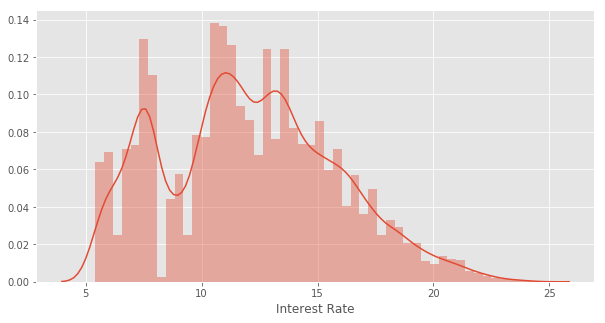

In [69]:
#we will see the int_rate variance and data spread to identify the bin size.
plt.figure(figsize=(10,5))
sns.distplot(loan['int_rate'], axlabel='Interest Rate')
plt.show()

In [70]:
loan.int_rate.describe()

count    36433.000000
mean        12.073862
std          3.734758
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

In [71]:
#Lets derive new column int_rate_bin
loan['int_rate_bin'] = pd.cut(loan['int_rate'], [x for x in range(0, 26, 5)], 
                                      labels=[str(x)+'-'+str(x+5)+'%' for x in range (0, 25, 5)])

In [72]:
loan[['int_rate', 'int_rate_bin']].head()

,int_rate,int_rate_bin
1,15.27,15-20%
3,13.49,10-15%
4,12.69,10-15%
5,7.90,5-10%
6,15.96,15-20%


Text(0, 0.5, 'Charged Off loans in %')

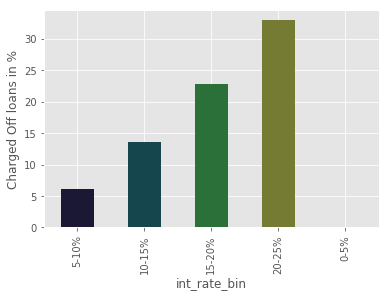

In [73]:
grp = loan.groupby(['loan_status','int_rate_bin'])['int_rate_bin'].count()
cnt = loan.groupby('int_rate_bin')['int_rate_bin'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

Form above plot we can see that charge-offs are more for loans with higher interest rates.

#### Revol_Util vs Loan Status

In [74]:
loan.revol_util.describe()

count    36433.000000
mean        49.276251
std         28.191811
min          0.000000
25%         26.100000
50%         49.900000
75%         72.700000
max         99.900000
Name: revol_util, dtype: float64

In [75]:
loan['revol_util_bin'] = pd.cut(loan['revol_util'], [x for x in range(0, 101, 10)], 
                                      labels=[str(x)+'-'+str(x+10)+'%' for x in range (0, 100, 10)])

In [76]:
loan[['revol_util', 'revol_util_bin']].head()

,revol_util,revol_util_bin
1,9.4,0-10%
3,21.0,20-30%
4,53.9,50-60%
5,28.3,20-30%
6,85.6,80-90%


Text(0, 0.5, 'Charged Off loans in %')

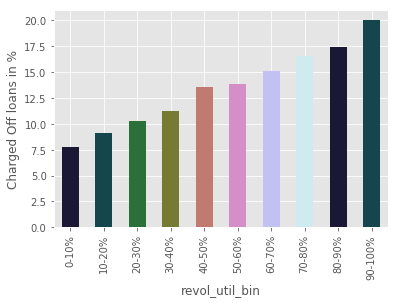

In [77]:
grp = loan.groupby(['loan_status','revol_util_bin'])['revol_util_bin'].count()
cnt = loan.groupby('revol_util_bin')['revol_util_bin'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

Revolving credit utilization is a good indicator of borrowers defaulting on loan, we can see in above plot charge-offs increases linearly with revol_util rate.